In [2]:
import os

# import sys

# sys.path.append(os.path.dirname(os.getcwd()))

DATA_PATH = os.path.join("..", "datasets", "nyc-taxi-trip-duration-extended")
MAPDATA_PATH = os.path.join("..", "datasets", "neighborhoods-in-new-york")

In [3]:
import pandas as pd

df = pd.read_csv(os.path.join(DATA_PATH, "train_extended.csv"))

In [4]:
demand_per_route = df.groupby(["pickup_neighbourhood", "dropoff_neighbourhood"])[
    "id"
].count()
demand_per_route

pickup_neighbourhood  dropoff_neighbourhood
Arden Heights         Arden Heights            135
                      Arrochar                 222
                      Arverne                  652
                      Bath Beach               209
                      Bay Ridge                553
                                              ... 
Woodrow               Sheepshead Bay             7
                      South Beach                2
                      Sunset Park                1
                      Tottenville              852
                      Woodrow                   45
Name: id, Length: 4768, dtype: int64

In [5]:
nyc_info = pd.read_csv(os.path.join(DATA_PATH, "nyc_additional_info.csv"))
nyc_neighborhoods = nyc_info["neighbourhood"].unique()
print(len(nyc_neighborhoods))
nyc_neighborhoods

221


array(['Tottenville', "Prince's Bay", 'Huguenot', 'Woodrow',
       'Eltingville', 'Great Kills', 'Arden Heights', 'Rossville',
       'Bay Terrace, Staten Island', 'Oakwood', 'New Dorp Beach',
       'Breezy Point', 'Neponsit', 'Midland Beach', 'New Dorp',
       'Richmondtown', 'Coney Island', 'Belle Harbor', 'Sea Gate',
       'Brighton Beach', 'Lighthouse Hill', 'Manhattan Beach',
       'Grant City', 'Dongan Hills', 'New Springville', 'Sheepshead Bay',
       'Rockaway Beach', 'Todt Hill', 'Gravesend', 'South Beach',
       'Arverne', 'Arrochar', 'Edgemere', 'Far Rockaway', "Bull's Head",
       'Fort Wadsworth', 'Concord', 'Bayswater', 'Bath Beach',
       'Willowbrook', 'Bensonhurst', 'Shore Acres', 'Emerson Hill',
       'Rosebank', 'Mill Basin', 'Midwood', 'Borough Park',
       'Castleton Corners', 'Grymes Hill', 'Fort Hamilton', 'Westerleigh',
       'Flatlands', 'Clifton', 'Dyker Heights', 'Bergen Beach',
       'Bay Ridge', 'Tompkinsville', 'Graniteville', 'Silver Lake',
 

['Suffolk' 'Queens' 'Rockland' 'New York' 'Nassau' 'Bronx' 'Kings'
 'Richmond' 'Putnam']


/tmp/ipykernel_987/1832619555.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_map["center"] = nyc_map["geometry"].centroid


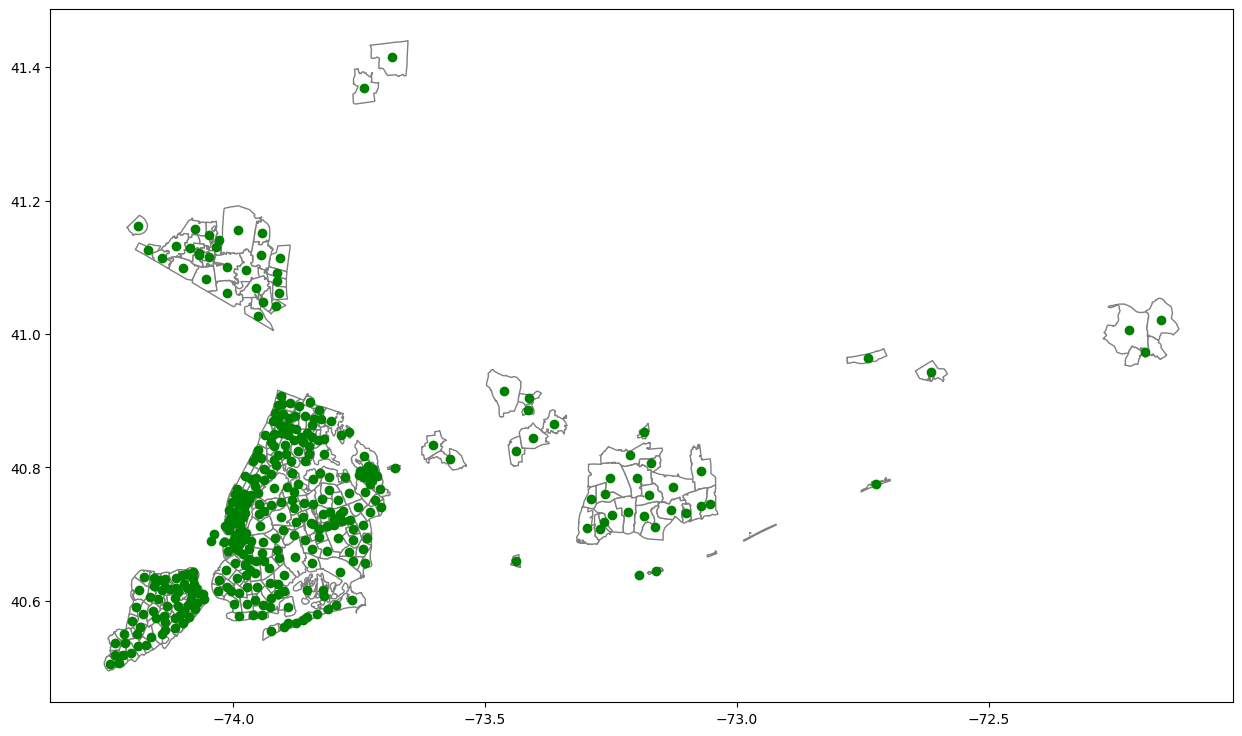

In [6]:
import geopandas
import matplotlib.pyplot as plt

# Annotate and mark the locations
nyc_map = geopandas.read_file(os.path.join(MAPDATA_PATH, "ZillowNeighborhoods-NY.shp"))

whitelist_county = [
    "Kings",
    "Queens",
    "Bronx",
    "Nassau",
    "Richmond",
    "Suffolk",
    "New York",
    # "Westchester",
    "Rockland",
    "Putnam",
]


def filter_neighborhoods(row):
    return row in nyc_neighborhoods


def filter_counties(row):
    return row in whitelist_county


# nyc_map_filter = nyc_map["Name"].apply(filter_neighborhoods)
# nyc_map = nyc_map[nyc_map_filter]

nyc_map_filter = nyc_map["County"].apply(filter_counties)
nyc_map = nyc_map[nyc_map_filter]

print(nyc_map["County"].unique())
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
nyc_map.plot(ax=ax, color="white", edgecolor="grey")

nyc_map["center"] = nyc_map["geometry"].centroid

for i, row in nyc_map.iterrows():
    # long, lat = row["center"]
    ax.plot(row["center"].x, row["center"].y, "go")
    # ax.annotate(row["state"], (row["longitude"], row["latitude"]))

plt.show()